In [4]:
!nvidia-smi

Sun Dec  3 05:32:22 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.29.04              Driver Version: 546.17       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce MX150           On  | 00000000:01:00.0 Off |                  N/A |
| N/A   45C    P8              N/A / ERR! |      0MiB /  2048MiB |      2%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install opencv-python
# !pip install pandas

from PIL import Image
from tqdm import tqdm
from glob import glob

from sklearn.model_selection import train_test_split

import os
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
# import cv2
import json

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

2023-12-03 17:28:45.948646: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 17:28:45.948985: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 17:28:46.067069: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 17:28:46.396926: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 17:28:51.957046: W tensorflow/compiler/tf2

In [3]:
path = '../../data/planesnet/planesnet/'
def create_data(path_name):
    images = [np.zeros([20,20,3])]
    labels = [0]
    for img in tqdm(os.listdir(path_name)):
        if(img[0]=='1'):
            labels.append(1)
        else:
            labels.append(0)
        image = Image.open(os.path.join(path_name,img))
        image = np.array(image)
        images.append(image)
        
    return np.array(images),np.array(labels)
images, labels = create_data(path)

100%|██████████| 32000/32000 [00:25<00:00, 1237.57it/s]


In [13]:
print(images[0].shape)
print(labels[50:60])

(20, 20, 3)
[0 0 0 0 0 0 0 0 1 0]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25, random_state = 42)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 20, 20, 3)
(8001, 20, 20, 3)
(24000,)
(8001,)


In [14]:
#RESHAPING AND NORMALIZATION
X_train = X_train.astype('float32')
X_train = X_train.reshape(X_train.shape[0],20,20,3)
X_train = X_train / 255.

X_test = X_test.astype('float32')
X_test = X_test.reshape(X_test.shape[0], 20,20,3)
X_test = X_test / 255.

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D

# model architecture building
model_1 = Sequential()

model_1.add(BatchNormalization(input_shape = (20, 20, 3)))

model_1.add(Convolution2D(filters = 32, kernel_size = 3, activation ='relu', input_shape = (20, 20, 3))) 
model_1.add(MaxPooling2D(pool_size = 2))


model_1.add(Convolution2D(filters = 64, kernel_size = 3, padding = 'same', activation = 'relu'))
model_1.add(MaxPooling2D(pool_size = 2))

model_1.add(Flatten()) 

# fully connected layer
model_1.add(Dense(units = 64,activation = 'relu'))

# Classification layer
model_1.add(Dense(units = 1, activation = 'sigmoid')) 

2023-12-03 00:33:32.762814: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-03 00:33:32.762974: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-03 00:33:32.787209: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-03 00:33:32.881560: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-03 00:33:34.840063: W tensorflow/compiler/tf2

In [16]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.0001)
model_1.compile(optimizer=opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 20, 20, 3)         12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 18, 18, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 32)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 64)          0         
 g2D)                                                            
                                                        

In [17]:
model = model_1.fit(X_train, y_train, epochs = 30, batch_size = 32, validation_data = (X_test, y_test),verbose=1)

2023-12-03 00:34:38.019132: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 115200000 exceeds 10% of free system memory.
2023-12-03 00:34:38.897445: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 115200000 exceeds 10% of free system memory.


Epoch 1/30


2023-12-03 00:34:39.970358: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-03 00:34:40.779486: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied
2023-12-03 00:34:42.598212: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied
2023-12-03 00:34:43.338254: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f9ad21df000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-03 00:34:43.338306: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce MX150, Compute Capability 6.1
2023-12-03 00:34:43.444754: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1701560083.869334   26536 device_compiler.h:186] Compiled clu

744/750 [============================>.] - ETA: 0s - loss: 0.1723 - accuracy: 0.9350

2023-12-03 00:34:52.680354: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38404800 exceeds 10% of free system memory.
2023-12-03 00:34:52.845489: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 38404800 exceeds 10% of free system memory.


750/750 [==============================] - 15s 10ms/step - loss: 0.1716 - accuracy: 0.9352 - val_loss: 0.0899 - val_accuracy: 0.9673
Epoch 2/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0912 - accuracy: 0.9663 - val_loss: 0.0594 - val_accuracy: 0.9776
Epoch 3/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0693 - accuracy: 0.9758 - val_loss: 0.0655 - val_accuracy: 0.9779
Epoch 4/30
750/750 [==============================] - 8s 10ms/step - loss: 0.0556 - accuracy: 0.9801 - val_loss: 0.0489 - val_accuracy: 0.9830
Epoch 5/30
750/750 [==============================] - 8s 11ms/step - loss: 0.0453 - accuracy: 0.9842 - val_loss: 0.0413 - val_accuracy: 0.9859
Epoch 6/30
750/750 [==============================] - 8s 11ms/step - loss: 0.0396 - accuracy: 0.9862 - val_loss: 0.0474 - val_accuracy: 0.9833
Epoch 7/30
750/750 [==============================] - 8s 11ms/step - loss: 0.0284 - accuracy: 0.9903 - val_loss: 0.0394 - val_accuracy: 0.9870
Epoch 8/3

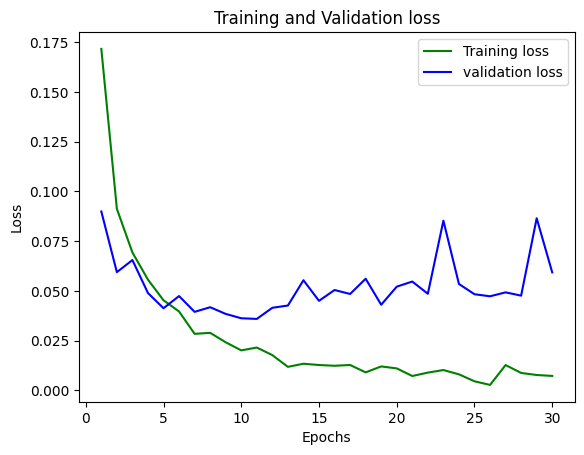

In [18]:
EPOCH=30
loss_train = model.history['loss']
loss_val = model.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

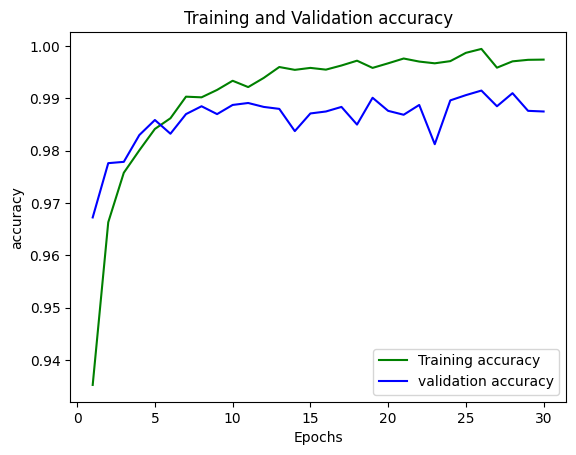

In [21]:
EPOCH=30
Acc_train = model.history['accuracy']
Acc_val = model.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

2023-12-03 17:29:26.333873: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-03 17:29:27.890274: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-03 17:29:27.890526: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-03 17:29:27.925991: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-03 17:29:27.926231: I external/local_xla/xla/stream_executor

(20, 20, 3)
<class 'numpy.ndarray'>
(1, 20, 20, 3)


2023-12-03 17:29:37.014595: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902


1/1 [==============================] - 9s 9s/step
[[0.99999976]]


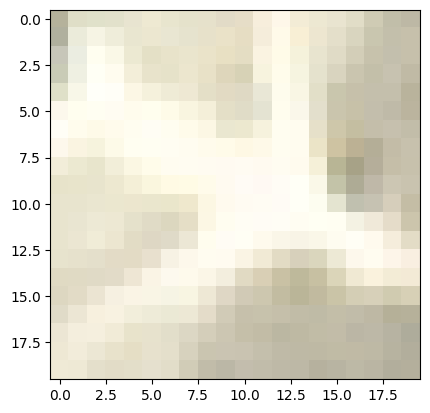

In [4]:
import tensorflow as tf
# model_1.save("./model.keras")
model = tf.keras.models.load_model('./model.keras')
print(images[10].shape)
img_test = images[115]
print(type(img_test))
plt.imshow(img_test.astype('uint8'))
img_test = img_test.astype('float32')

img_test = img_test.reshape(1, 20,20,3)
img_test = img_test / 255.
print(img_test.shape)
val = model.predict(img_test)

print(val)


size is 1722 x 2132
0 0.9555778503417969 346.0 122.5 353.5 128.0
0 0.9006257057189941 143.0 104.5 151.0 110.0
0 0.9592434763908386 1936.5 0.0 1943.5 3.5
0 0.9711615443229675 322.5 422.0 330.5 429.0
0 0.9464664459228516 424.5 493.0 433.0 498.0
0 0.8353636264801025 833.5 593.5 841.5 601.0
0 0.767225444316864 165.5 782.5 175.5 788.5
0 0.9471830129623413 373.0 797.0 380.0 803.0
0 0.824184775352478 482.0 674.5 490.5 681.0
0 0.8377645015716553 1003.0 835.5 1010.5 840.0
found one
833x1001 => 0.9971574544906616
found one
833x1002 => 0.9997500777244568
found one
833x1003 => 0.9771910905838013
0.99
0 0.9970430731773376 1202.0 816.0 1209.5 823.0
found one
814x1200 => 0.9987504482269287
0.99
0 0.9337709546089172 550.0 889.5 557.5 896.0
0 0.9948670864105225 1055.5 891.0 1063.5 896.5
found one
889x1054 => 0.9956641793251038
0.99
0 0.7697972655296326 1014.0 1069.0 1022.0 1074.5
0 0.9986109733581543 1076.0 904.0 1083.0 910.0
found one
902x1075 => 0.984228253364563
0.98
0 0.9899497032165527 1095.5 904.

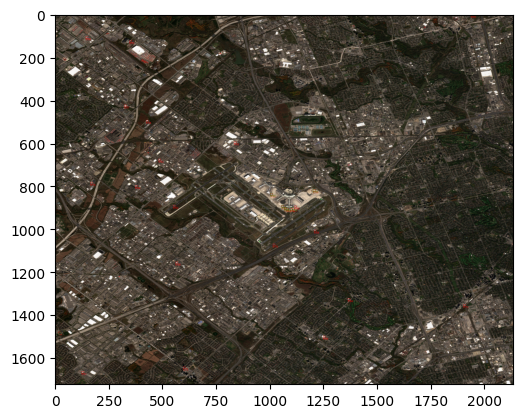

In [8]:
!pip install imutils

import imutils
import cv2
import time
import csv
from PIL import ImageDraw, ImageFont

image = Image.open("./img.tiff")
image_temp = Image.open("./img.tiff")
orig = np.array(image)
#orig = imutils.resize(orig, width = WIDTH)
(H, W) = orig.shape[:2] 
visualize = 1
print(f"size is {H} x {W}")

# helpers
def draw_rect(w,h, color, text):
    shape = [(w, h), (w + 10, h + 10)] 
    # create rectangle image
    font = ImageFont.truetype('../fonts/OpenSans-Regular.ttf', 12) 
    img1 = ImageDraw.Draw(image_temp)   
    img1.text((w, h+5), text, font = font,fill=color,align ="left") 
    img1.rectangle(shape, outline=color, width=1)


f = open("data_filtered.csv", "a")
def find(init_i, init_j, search_size):  
    num = 0
    i = max(init_i-search_size, 0) 
    j = max(init_j-search_size, 0)
    end_i = min(H-10, init_i + search_size)
    end_j = min(W-10, init_j + search_size)
    m_val = 0
    m_i = 0
    m_j = 0
    while i < end_i:
        while j < end_j:
            #if j % 100 == 0:
            # print(j) 
            cropped_image = orig[i:(i+10), j:(j+10)]
            img_test = cropped_image.astype('float32')
            img_test  = imutils.resize(img_test , width = 20)
            img_test = img_test.reshape(1, 20,20,3)
            img_test = img_test / 255.
            val = model.predict(img_test, verbose = 0)
            # print(val)
            # draw_rect(j,i, "red")
            found = False
            if( val[0][0] >= 0.8):
                print("found one")
                found = True
                # draw_rect(j,i, "green")
                print(f"{i}x{j} => {val[0][0]}")
                # f.write(f"{j},{i},{val[0][0]}\n")
            if found and m_val < val[0][0]:
                m_val = val[0][0]
                m_i = i
                m_j = j
            j = j + 1
        j = init_j
        i = i + 1
    if(m_val > 0):
        f.write(f"{j},{i},{m_val}\n")
        print(f"{m_val}"[:4])
        draw_rect(m_j,m_i, "green", f"{m_val}"[:4] )
    return
        
def load_cvs(path, search_size):
    with open(path, newline='\n') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=',')
        for row in reader:
            print(row['type'], row['score'], row['x1'], row['y1'], row['x2'], row['y2'])
            draw_rect( int(float(row['x1'])), int(float(row['y1'])) , "red", row['score'][:4])
            find(int(float(row['y1'])), int(float(row['x1'])),search_size)

load_cvs('./data_detector2.csv', 2)

plt.imshow(image_temp)
image_temp.save("./results.tiff") 
image_temp.save("./results.png") 
print("end")
f.close()
